In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Load the dataset
transform = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)
test_dataset = datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=64,
    shuffle=True
)
test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=64,
    shuffle=False
)

# Define the model
class FashionMNISTModel(nn.Module):
    def __init__(self):
        super(FashionMNISTModel, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 10),  # 10 classes for FashionMNIST
            nn.LogSoftmax(dim=1)  # LogSoftmax for multi-class classification
        ) # often abbreviated to "ops"
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits # log probabilities that indicate the confidence of the model

model = FashionMNISTModel()

# Define the loss function and optimizer
loss_function = nn.NLLLoss() # Negative Log Likelihood Loss - for multi-class classification
# passes parameters to the optimizer to optimize for lower loss
optimizer = optim.Adam(model.parameters()) # Faster and more accurate than SGD

# Train the model
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # model can be set to different modes to optimize performance for training, inference or evaluation
    model.train() # Set the model to training mode, which enables dropout and batch normalization layers
    for batch, (X,y) in enumerate(dataloader): # Use dataloader only loads the data when needed
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
        
# Training process
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_loader, model, loss_function, optimizer)
print("Done!")

Epoch 1
-------------------------------
loss: 2.334072  [    0/60000]
loss: 0.637571  [ 6400/60000]
loss: 0.474858  [12800/60000]
loss: 0.441892  [19200/60000]
loss: 0.619886  [25600/60000]
loss: 0.309498  [32000/60000]
loss: 0.352975  [38400/60000]
loss: 0.504916  [44800/60000]
loss: 0.618955  [51200/60000]
loss: 0.515899  [57600/60000]
Epoch 2
-------------------------------
loss: 0.445866  [    0/60000]
loss: 0.495442  [ 6400/60000]
loss: 0.503632  [12800/60000]
loss: 0.452827  [19200/60000]
loss: 0.274984  [25600/60000]
loss: 0.444188  [32000/60000]
loss: 0.203212  [38400/60000]
loss: 0.267432  [44800/60000]
loss: 0.444034  [51200/60000]
loss: 0.430673  [57600/60000]
Epoch 3
-------------------------------
loss: 0.192283  [    0/60000]
loss: 0.588697  [ 6400/60000]
loss: 0.181197  [12800/60000]
loss: 0.299185  [19200/60000]
loss: 0.280489  [25600/60000]
loss: 0.202072  [32000/60000]
loss: 0.320793  [38400/60000]
loss: 0.507163  [44800/60000]
loss: 0.450777  [51200/60000]
loss: 0.32

In [8]:
# Function to test the model
def test(dataloader, model):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval() # set the model to evaluation mode
    test_loss, correct = 0, 0
    with torch.no_grad(): # no need to compute gradients during evaluation
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_function(pred, y).item()
            correct += (pred.argmax(1) ==
                        y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

# Evaluate the model
test(test_loader, model)

Test Error: 
 Accuracy: 86.4%, Avg loss: 0.368818 



## Explore the Model Output

tensor([[-12.5197, -16.5524, -14.6458, -13.8267, -10.7658,  -2.2793, -10.9626,
          -2.0535,  -8.3655,  -0.2625]])


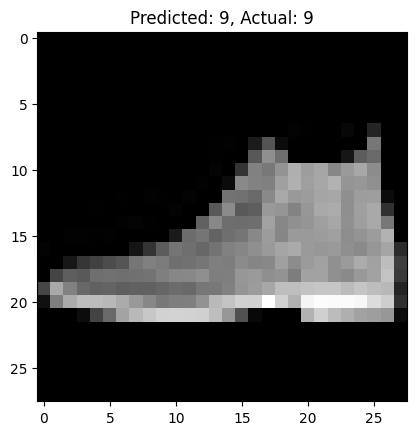

The model predicted 9, and the actual label is 9.


In [12]:
import matplotlib.pyplot as plt

def predict_single_image(image, label, model):
    # Set the model to evaluation mode
    model.eval()

    # Unsqueeze image as the model expects a batch dimension
    image = image.unsqueeze(0)

    with torch.no_grad():
        prediction = model(image)
        print(prediction)
        predicted_label = prediction.argmax(1).item()

    # Display the image and predictions
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f'Predicted: {predicted_label}, Actual: {label}')
    plt.show()

    return predicted_label

# Choose an image from the test set
image, label = test_dataset[0] # Change index to test different images

# Predict the class for the chosen image
predicted_label = predict_single_image(image, label, model)
print(f"The model predicted {predicted_label}, and the actual label is {label}.")

## Early Stopping Method

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Load the dataset
transform = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)
test_dataset = datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=64,
    shuffle=True
)
test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=64,
    shuffle=False
)

# Define the model
class FashionMNISTModel(nn.Module):
    def __init__(self):
        super(FashionMNISTModel, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 10),  # 10 classes for FashionMNIST
            nn.LogSoftmax(dim=1)  # LogSoftmax for multi-class classification
        ) # often abbreviated to "ops"
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits # log probabilities that indicate the confidence of the model

model = FashionMNISTModel()

# Define the loss function and optimizer
loss_function = nn.NLLLoss() # Negative Log Likelihood Loss - for multi-class classification
# passes parameters to the optimizer to optimize for lower loss
optimizer = optim.Adam(model.parameters()) # Faster and more accurate than SGD

# Function to calculate accuracy
def get_accuracy(pred, labels):
    _, predictions = torch.max(pred, 1)  # Get the index of the max log-probability
    correct = (predictions == labels).float().sum() # Count correct predictions
    accuracy = correct / labels.shape[0]  # Normalize by the number of labels
    return accuracy

# Train the model
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    total_loss, total_accuracy = 0, 0
    # model can be set to different modes to optimize performance for training, inference or evaluation
    model.train() # Set the model to training mode, which enables dropout and batch normalization layers
    for batch, (X,y) in enumerate(dataloader): # Use dataloader only loads the data when needed
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        accuracy = get_accuracy(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()  # Store the loss for logging
        total_accuracy += accuracy.item()

        if batch % 100 == 0:
            current = batch * len(X)
            avg_loss = total_loss / (batch +1)
            avg_accuracy = total_accuracy / (batch + 1) * 100
            loss, current = loss.item(), batch * len(X)
            print(f"Batch {batch}, Loss: {avg_loss:>7f}, Accuracy: {avg_accuracy:>0.2f}% [{current:>5d}/{size:>5d}]")

        if avg_accuracy >= 95:
            print("Reached 95% accuracy, stopping training")
            return True # Stop training

# Training process
epochs = 50
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    if train(train_loader, model, loss_function, optimizer):
        print("Early stopping triggered.")
        break
print("Done!")

Epoch 1
-------------------------------
Batch 0, Loss: 2.298838, Accuracy: 10.94% [    0/60000]
Batch 100, Loss: 0.960211, Accuracy: 68.70% [ 6400/60000]
Batch 200, Loss: 0.778762, Accuracy: 74.48% [12800/60000]
Batch 300, Loss: 0.700082, Accuracy: 76.51% [19200/60000]
Batch 400, Loss: 0.649925, Accuracy: 78.09% [25600/60000]
Batch 500, Loss: 0.614288, Accuracy: 79.20% [32000/60000]
Batch 600, Loss: 0.590900, Accuracy: 79.95% [38400/60000]
Batch 700, Loss: 0.573772, Accuracy: 80.49% [44800/60000]
Batch 800, Loss: 0.560105, Accuracy: 80.86% [51200/60000]
Batch 900, Loss: 0.547899, Accuracy: 81.21% [57600/60000]
Epoch 2
-------------------------------
Batch 0, Loss: 0.423711, Accuracy: 84.38% [    0/60000]
Batch 100, Loss: 0.425381, Accuracy: 84.82% [ 6400/60000]
Batch 200, Loss: 0.421625, Accuracy: 85.08% [12800/60000]
Batch 300, Loss: 0.422464, Accuracy: 85.14% [19200/60000]
Batch 400, Loss: 0.417105, Accuracy: 85.25% [25600/60000]
Batch 500, Loss: 0.414943, Accuracy: 85.35% [32000/600

In [18]:
# evaluate the model
def test(dataloader, model):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval() # set the model to evaluation mode
    test_loss, correct = 0, 0
    with torch.no_grad(): # no need to compute gradients during evaluation
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_function(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

# Evaluate the model
test(test_loader, model)

Test Error: 
 Accuracy: 88.3%, Avg loss: 0.350219 

